Nearest Neighbor - Test Case 1
Total Cost: 1441.7523747477
Opt Gap: 26.4517589415%
Solve Time: 0.0000000000s
Tour Path: [0, 2, 1, 5, 4, 9, 6, 3, 8, 7, 0]


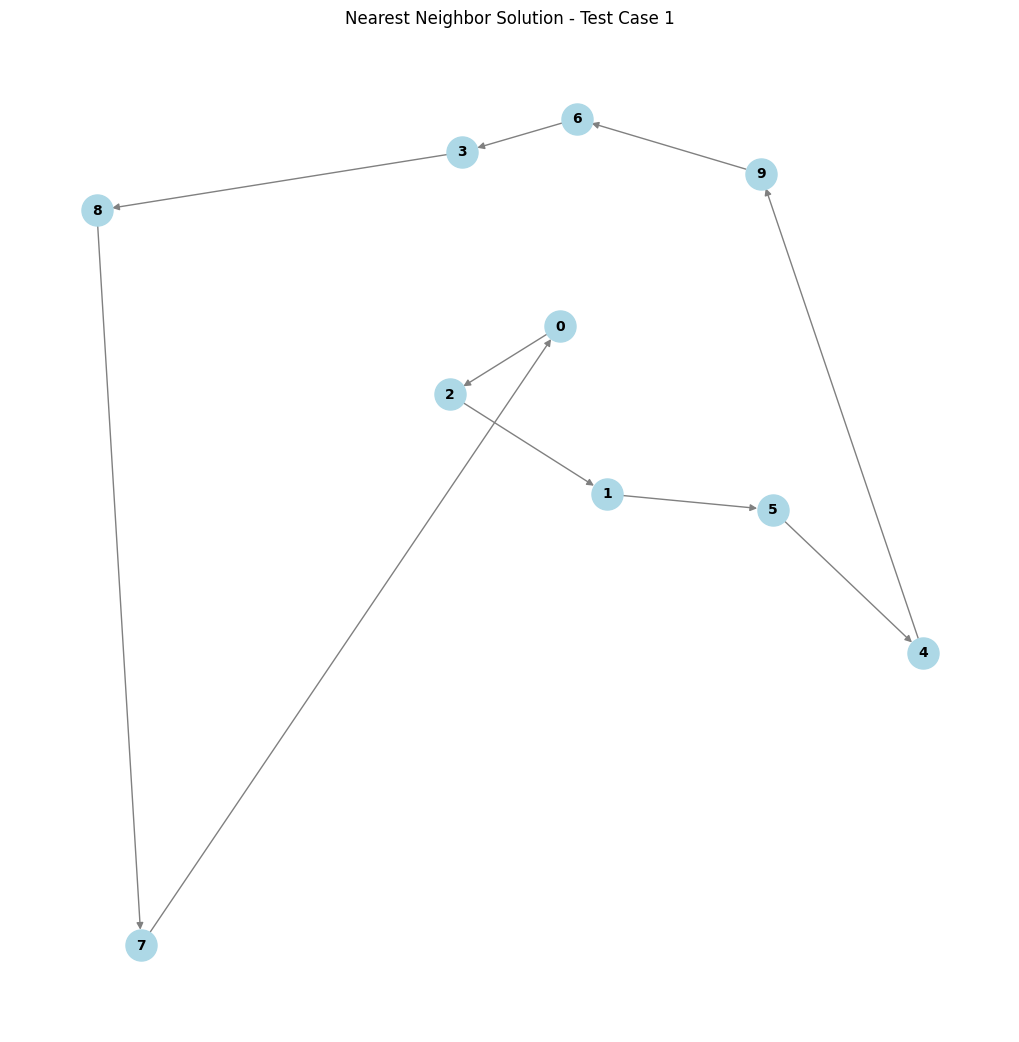

Nearest Neighbor - Test Case 2
Total Cost: 649.6835905365
Opt Gap: 60.1073464775%
Solve Time: 0.0000000000s
Tour Path: [0, 5, 8, 4, 3, 9, 2, 1, 7, 6, 0]


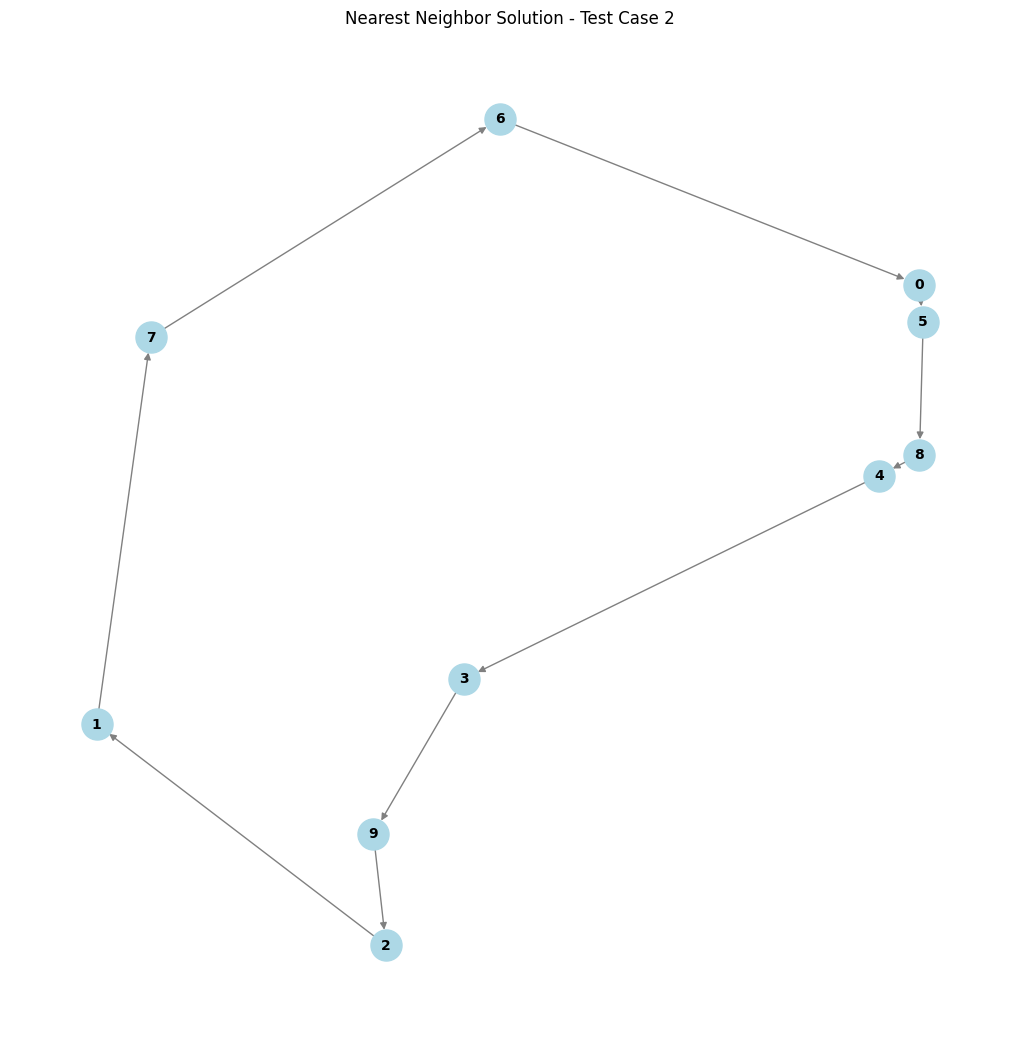

In [2]:
import numpy as np
import time
from data_generation import generate_data
from visualizations import plot_tour_graph

def nearest_neighbor_solver_with_penalties(coords, time_windows, travel_time):
    num_cities = len(coords)
    visited = [False] * num_cities
    current_city = 0
    visited[current_city] = True
    route = [current_city]
    total_cost = 0
    current_time = 0

    while len(route) < num_cities:
        nearest_city = None
        min_distance = float('inf')

        for next_city in range(num_cities):
            if not visited[next_city] and travel_time[current_city, next_city] < min_distance:
                nearest_city = next_city
                min_distance = travel_time[current_city, next_city]

        # Travel
        current_time += min_distance

        # Penalties
        earliest, latest = time_windows[nearest_city]
        penalty = 0
        if current_time < earliest:
            penalty += earliest - current_time
            current_time = earliest
        elif current_time > latest:
            penalty += current_time - latest

        total_cost += min_distance + penalty
        visited[nearest_city] = True
        route.append(nearest_city)
        current_city = nearest_city

    # Return to origin
    return_distance = travel_time[current_city, route[0]]
    current_time += return_distance
    earliest, latest = time_windows[route[0]]
    penalty = 0
    if current_time < earliest:
        penalty += earliest - current_time
        current_time = earliest
    elif current_time > latest:
        penalty += current_time - latest

    total_cost += return_distance + penalty
    route.append(route[0])

    return route, total_cost

def convert_route_to_adjacency_matrix(route, num_cities):
    adj_matrix = np.zeros((num_cities, num_cities))
    for i in range(len(route) - 1):
        adj_matrix[route[i], route[i + 1]] = 1
    return adj_matrix

if __name__ == "__main__":
    num_cases = 2
    num_cities = 10  # Adjusted for testing larger graphs
    lagrangian_lower_bounds = [1140.16, 405.78]  # Example lower bounds

    for test_id in range(num_cases):
        coords, time_windows, travel_time = generate_data(num_cities, seed=test_id)

        # Time the solver execution
        start_time = time.time()
        nn_route, nn_cost = nearest_neighbor_solver_with_penalties(coords, time_windows, travel_time)
        solve_time = time.time() - start_time

        lag_lb = lagrangian_lower_bounds[test_id]
        opt_gap = ((nn_cost - lag_lb) / lag_lb) * 100

        # Display results
        print(f"Nearest Neighbor - Test Case {test_id + 1}")
        print(f"Total Cost: {nn_cost:.10f}")
        print(f"Opt Gap: {opt_gap:.10f}%")
        print(f"Solve Time: {solve_time:.10f}s")
        print(f"Tour Path: {nn_route}")

        # Convert route to adjacency matrix and plot (not part of timing)
        nn_adj_matrix = convert_route_to_adjacency_matrix(nn_route, num_cities)
        plot_tour_graph(coords, nn_adj_matrix, title=f"Nearest Neighbor Solution - Test Case {test_id + 1}")
